In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('sales.xlsx')
df

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,7765,55558,2010-08-09,Medium,8,1294.0400,0.05,Delivery Truck,-323.1800,150.98,...,Mick Brown,Alberta,West,Consumer,Furniture,Bookcases,Bush Mission Pointe Library,Jumbo Box,0.65,2010-08-09
8395,7766,55558,2010-08-09,Medium,23,392.5700,0.04,Regular Air,22.2500,17.07,...,Mick Brown,Alberta,West,Consumer,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...,Small Box,0.38,2010-08-11
8396,7906,56550,2011-04-08,Not Specified,37,823.7800,0.03,Express Air,343.0500,22.23,...,Frank Hawley,Alberta,West,Home Office,Furniture,Office Furnishings,"Executive Impressions 14""",Small Pack,0.41,2011-04-10
8397,7907,56550,2011-04-08,Not Specified,8,469.8375,0.00,Regular Air,-159.2360,65.99,...,Frank Hawley,Alberta,West,Home Office,Technology,Telephones and Communication,Talkabout T8367,Small Box,0.56,2011-04-09


In [3]:
# renommeer la colonne 'unit price'
df = df.rename(columns={'Unit Price':'UnitPrice'})

c:\Users\ZhuanZ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UnitPrice'>

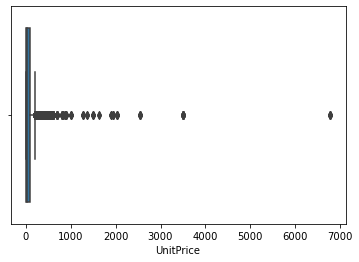

In [4]:
# plot
sns.boxplot(df['UnitPrice'])

In [5]:
# Detection des valleurs aberrantes par IQR 
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

In [6]:
# Localiser les valeurs aberrantes 
df_aberrantes = df[(df['UnitPrice'] < lower_limit) | (df['UnitPrice'] > upper_limit)]
df_aberrantes

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,UnitPrice,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
1,49,293,2012-10-01,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
27,250,1761,2010-12-23,High,25,12028.23,0.01,Delivery Truck,-547.61,449.99,...,Carl Ludwig,Nunavut,Nunavut,Corporate,Technology,Copiers and Fax,Canon PC940 Copier,Jumbo Drum,0.38,2010-12-25
39,440,2976,2010-12-09,Not Specified,30,14223.82,0.09,Delivery Truck,3424.22,500.98,...,Edward Hooks,Nunavut,Nunavut,Consumer,Furniture,Chairs & Chairmats,Global Troy™ Executive Leather Low-Back Tilter,Jumbo Drum,0.60,2010-12-11
60,853,6116,2009-03-20,Medium,6,9620.82,0.04,Regular Air,-1759.58,1637.53,...,Barry Weirich,Nunavut,Nunavut,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",High Speed Automatic Electric Letter Opener,Medium Box,0.81,2009-03-22
71,988,7110,2011-08-07,Low,22,6396.20,0.02,Regular Air,1902.24,276.20,...,Grant Carroll,Nunavut,Nunavut,Corporate,Furniture,Chairs & Chairmats,SAFCO Arco Folding Chair,Large Box,NaN,2011-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8343,7029,50148,2012-02-01,Medium,9,17965.45,0.00,Regular Air,3459.43,1938.02,...,Roy Phan,Alberta,West,Consumer,Technology,Office Machines,Polycom ViewStation™ Adapter H323 Videoconfere...,Medium Box,0.38,2012-02-03
8351,7268,51872,2012-04-23,Medium,10,2193.93,0.09,Regular Air,41.83,238.40,...,Shui Tom,Alberta,West,Consumer,Furniture,Chairs & Chairmats,Safco Contoured Stacking Chairs,Large Box,NaN,2012-04-24
8371,8006,57216,2010-07-29,High,46,12719.70,0.03,Delivery Truck,-545.82,280.98,...,Ruben Dartt,Alberta,West,Corporate,Furniture,Chairs & Chairmats,Hon 2090 “Pillow Soft” Series Mid Back Swivel/...,Jumbo Drum,0.78,2010-07-29
8387,5167,36772,2010-05-15,Medium,16,12007.05,0.09,Delivery Truck,2713.95,808.49,...,Frank Hawley,Alberta,West,Home Office,Technology,Office Machines,"Hewlett-Packard Business Color Inkjet 3000 [N,...",Jumbo Drum,0.40,2010-05-17


In [7]:
# supprimer les outliers
df_clean = df[(df['UnitPrice'] >= lower_limit) & (df['UnitPrice'] <= upper_limit)]
df_clean

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,UnitPrice,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30
5,86,515,2010-08-28,Not Specified,21,146.6900,0.05,Regular Air,4.4300,6.64,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Furniture,Office Furnishings,G.E. Longer-Life Indoor Recessed Floodlight Bulbs,Small Pack,0.37,2010-08-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,7765,55558,2010-08-09,Medium,8,1294.0400,0.05,Delivery Truck,-323.1800,150.98,...,Mick Brown,Alberta,West,Consumer,Furniture,Bookcases,Bush Mission Pointe Library,Jumbo Box,0.65,2010-08-09
8395,7766,55558,2010-08-09,Medium,23,392.5700,0.04,Regular Air,22.2500,17.07,...,Mick Brown,Alberta,West,Consumer,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...,Small Box,0.38,2010-08-11
8396,7906,56550,2011-04-08,Not Specified,37,823.7800,0.03,Express Air,343.0500,22.23,...,Frank Hawley,Alberta,West,Home Office,Furniture,Office Furnishings,"Executive Impressions 14""",Small Pack,0.41,2011-04-10
8397,7907,56550,2011-04-08,Not Specified,8,469.8375,0.00,Regular Air,-159.2360,65.99,...,Frank Hawley,Alberta,West,Home Office,Technology,Telephones and Communication,Talkabout T8367,Small Box,0.56,2011-04-09
